# NumPy를 이용한 KNN 구현

이 노트북에서는 NumPy를 사용하여 K-최근접 이웃(K-Nearest Neighbors, KNN) 알고리즘을 직접 구현하는 방법을 다룹니다. 
또한, 모델의 성능을 혼동 행렬로 평가하고 이를 히트맵으로 시각화할 것입니다.

### 단계:
1. Iris 데이터셋 불러오기
2. 학습 및 테스트 데이터로 분할하기
3. NumPy로 KNN 분류기 구현하기
4. 혼동 행렬을 사용하여 모델 정확도 평가하기
5. 혼동 행렬을 히트맵으로 시각화하기


In [1]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Iris 데이터셋 불러오기

In [9]:
# Iris 데이터셋 로드
iris = datasets.load_iris()

In [10]:
x = iris.data  # 특징 데이터
y = iris.target  # 클래스 레이블

### 2. 데이터셋 분할

In [11]:
# 데이터셋을 학습(80%)과 테스트(20%)로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

### 3. KNN 분류기 구현

In [20]:
# KNN 클래스 정의
class KNN:
    def __init__(self, k=3):  # k의 기본값은 3으로 설정
        self.k = k

    def fit(self, x_train, y_train):
        # 학습 데이터를 저장
        self.x_train = x_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        # 두 벡터 사이의 유클리드 거리 계산
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, x_test):
        # 테스트 데이터의 각 포인트에 대해 예측 수행
        predictions = [self._predict(x) for x in x_test]
        return np.array(predictions)

    def _predict(self, a):
        # 모든 학습 데이터와의 거리 계산
        distances = [self.euclidean_distance(a, a_train) for a_train in self.x_train]
        # 거리를 기준으로 정렬하고 가장 가까운 k개의 이웃 선택
        k_indices = np.argsort(distances)[:self.k]
        # 가장 가까운 k개의 이웃의 레이블 추출
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # 가장 흔한 클래스 레이블 반환
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

### 4. KNN 모델 학습

In [ ]:
# k=6으로 KNN 분류기 생성
knn = KNN(k=6)

In [14]:
# 학습 데이터로 모델 학습
knn.fit(x_train, y_train)

### 5. 예측 및 정확도 계산

In [ ]:
# 테스트 데이터에 대한 예측 수행
y_pred = knn.predict(x_test)

In [ ]:
# 혼동 행렬과 정확도 계산
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
# 결과 출력
print("Confusion Matrix:")
print(conf_matrix)
print(accuracy)

Confusion Matrix:
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
0.9666666666666667


### 6. 혼동 행렬 시각화

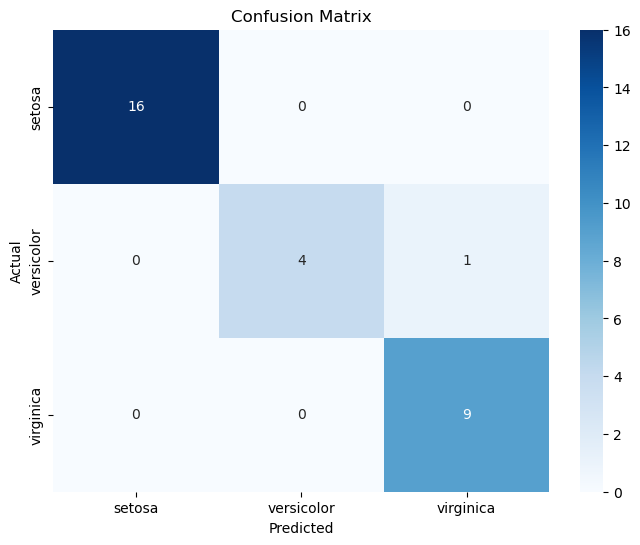

In [25]:
# seaborn의 heatmap을 사용하여 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()